# Module 8: Unsupervised ML techniques 2 on healthcare dataset features

## Section 1: Wrap-up features that created from assignment 5

### Section 1.1: Data Preparation, change columns and data types

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('inpatientCharges.csv')
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)
data.head(1)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73


In [85]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_1277/2932651901.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Total_Payments'] = (data['Average_Total_Payments']
/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_1277/2932651901.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']


### Section 1.2: Feature Engineering

#### Section 1.2.1: Create benchmark tables - State & DRG average

In [86]:
# AVG
benchmark_avg = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark_avg.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
#benchmark_avg.head()

# Median
benchmark_median = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark_median.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
#benchmark_median.head()

#### Section 1.2.1: Create benchmark tables - State & DRG average on "Average Medicare Payments"

In [87]:
# Overall Mean
benchmark_overall_avg = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].mean()
benchmark_overall_avg = pd.DataFrame(benchmark_overall_avg).T
benchmark_overall_avg

# Overall Median
#benchmark_Overall_median = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median()
#benchmark_Overall_median = pd.DataFrame(benchmark_Overall_median).T
#benchmark_Overall_median

benchmark_Overall_Average = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median()
benchmark_Overall_Average = pd.DataFrame(benchmark_Overall_Average).T
#benchmark_Overall_Average

# Median by state
benchmark_by_State = data.groupby(['Provider_State'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_State.columns = ['Provider_State','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
#benchmark_by_State.head()

# Median by state&DRG
benchmark_by_StateDRG = data.groupby(['Provider_State','DRG'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_StateDRG.columns = ['Provider_State','DRG','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
#benchmark_by_StateDRG.head()

# Mean by state&DRG
benchmark_by_StateDRG_avg = data.groupby(['Provider_State','DRG'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].mean().reset_index()
benchmark_by_StateDRG_avg.columns = ['Provider_State','DRG','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
#benchmark_by_StateDRG_avg.head()

#### Section 1.2.2: Revise Features and merge to dataset

In [88]:
Feature123 = pd.DataFrame()
Feature123['Avg_Total_Pymts_by_id_mean_Ratio'] = data['Average_Total_Payments']/benchmark_overall_avg['Average_Total_Payments']
Feature123['Avg_Medicare_Pymts_by_id_mean_Ratio'] = data['Average_Medicare_Payment']/benchmark_overall_avg['Average_Medicare_Payment']
Feature123['Avg_Total_Discharges_by_id_mean_Ratio'] = data['Total_Discharges']/benchmark_overall_avg['Total_Discharges']

Feature123.head(1)

,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio
0,0.595133,0.560802,2.127346


##### Thought process:

1. On assignment 5, I created 3 features('Average_Total_Payments','Average_Medicare_Payment','Total_Discharges') for 'overall' level in mean, 3 features in 'overall' level in median; 3 features for 'ST' level in mean, 3 features for 'ST&DRG'level in mean
2. For better accuracy improvement, I'd like to change the 3 features that created for 'overall' level in mean, change to 'ST&DRG' level in mean; These 3 features are feature 10-12 in the following

#### Feature 1-3: Compare total payments, medicare payments, total discharges to 'overall median' bechmark

In [89]:
df = pd.DataFrame()
df = df.append([benchmark_Overall_Average]*data.shape[0],ignore_index=True)
# rename columns
df = df.rename(columns={'Average_Total_Payments': 'Median_Avg_Total_Pymts', 
                        'Average_Medicare_Payment': 'Median_Avg_Medicare_Pymt',
                       'Total_Discharges': 'Median_Total_Discharges'})
#df

/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_1277/2184401094.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([benchmark_Overall_Average]*data.shape[0],ignore_index=True)


In [90]:
Feature123 = pd.DataFrame()
Feature123['Avg_Total_Pymts_Ratio'] = data['Average_Total_Payments']/df['Median_Avg_Total_Pymts']
Feature123['Avg_Medicare_Pymt_Ratio'] = data['Average_Medicare_Payment']/df['Median_Avg_Medicare_Pymt']
Feature123['Avg_Total_Discharges_Ratio'] = data['Total_Discharges']/df['Median_Total_Discharges']
#Feature123.head()

# Create an empty dataframe to collect the features
Features = pd.DataFrame()
Features[['ST','DRG']] = data[['Provider_State','DRG']]

# add the new feature average spending to the dataset 
Features =  [Features,Feature123]
Features = pd.concat(Features,axis=1)
Features.head(3)

,ST,DRG,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio
0,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.800826,0.773526,3.370370
1,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.802258,0.808109,0.518519
2,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.753379,0.723199,0.888889


#### Feature 4-6: The ratio of total payments, medicare payments, total discharges to 'State level median' bechmark

In [91]:
# add the new feature average spending to the dataset 
F456 = pd.merge(data, benchmark_by_State, how='left', on='Provider_State')
#F456.head()

Average_Total_Payments_byST = F456['Average_Total_Payments']/F456['Median_Average_Total_Payments']
Medicare_Payment_byST = F456['Average_Medicare_Payment']/F456['Median_Medicare_Payment']
Total_Discharges_byST = F456['Total_Discharges']/F456['Median_Total_Discharges']

Features['Avg_Total_Pymt_byST'] = Average_Total_Payments_byST
Features['Medicare_Pymt_byST'] = Average_Total_Payments_byST
Features['Total_Discharges_byST'] = Total_Discharges_byST
Features.tail(3)

,ST,DRG,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST
163062,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.790724,0.658989,0.703704,0.823440,0.823440,0.76
163063,TX,948 - SIGNS & SYMPTOMS W/O MCC,1.062238,1.112054,0.407407,1.106188,1.106188,0.44
163064,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.490671,0.468853,0.444444,0.510973,0.510973,0.48


#### Feature 7-9: The ratio of total payments, medicare payments, total discharges to 'State&DRG level median bechmark

In [92]:
# add the new feature average spending to the dataset 
F789 = pd.merge(data, benchmark_by_StateDRG, how='left', on='Provider_State' and 'DRG')
#F789.head()

Average_Total_Payments_bySTDRG = F789['Average_Total_Payments']/F789['Median_Average_Total_Payments']
Medicare_Payment_bySTDRG = F789['Average_Medicare_Payment']/F789['Median_Medicare_Payment']
Total_Discharges_bySTDRG = F789['Total_Discharges']/F789['Median_Total_Discharges']

Features['Avg_Total_Pymt_bySTDRG'] = Average_Total_Payments_bySTDRG
Features['Medicare_Pymt_bySTDRG'] = Average_Total_Payments_bySTDRG
Features['Total_Discharges_bySTDRG'] = Total_Discharges_bySTDRG

#### Feature 10-12: The ratio of total payments, medicare payments, total discharges to 'State&DRG level mean bechmark

In [93]:
# add the new feature average spending to the dataset 
F101112 = pd.merge(data, benchmark_by_StateDRG_avg, how='left', on='Provider_State' and 'DRG')
#F101112.head(3)

Average_Total_Payments_bySTDRG_avg = F101112['Average_Total_Payments']/F101112['Median_Average_Total_Payments']
Medicare_Payment_bySTDRG_avg = F101112['Average_Medicare_Payment']/F101112['Median_Medicare_Payment']
Total_Discharges_bySTDRG_avg = F101112['Total_Discharges']/F101112['Median_Total_Discharges']

Features['Avg_Total_Pymt_bySTDRG_avg'] = Average_Total_Payments_bySTDRG_avg
Features['Medicare_Pymt_bySTDRG_avg'] = Average_Total_Payments_bySTDRG_avg
Features['Total_Discharges_bySTDRG_avg'] = Total_Discharges_bySTDRG_avg

# For some hospitals, it is possible Total Discharges=0 and cause missing values in the dataset, 
Features.iloc[:,8:] = Features.iloc[:,8:].fillna(0)
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   ST                            163065 non-null  category
 1   DRG                           163065 non-null  category
 2   Avg_Total_Pymts_Ratio         163065 non-null  float64 
 3   Avg_Medicare_Pymt_Ratio       163065 non-null  float64 
 4   Avg_Total_Discharges_Ratio    163065 non-null  float64 
 5   Avg_Total_Pymt_byST           163065 non-null  float64 
 6   Medicare_Pymt_byST            163065 non-null  float64 
 7   Total_Discharges_byST         163065 non-null  float64 
 8   Avg_Total_Pymt_bySTDRG        163065 non-null  float64 
 9   Medicare_Pymt_bySTDRG         163065 non-null  float64 
 10  Total_Discharges_bySTDRG      163065 non-null  float64 
 11  Avg_Total_Pymt_bySTDRG_avg    163065 non-null  float64 
 12  Medicare_Pymt_bySTDRG_avg     

#### Features visualization

<AxesSubplot:xlabel='variable', ylabel='value'>

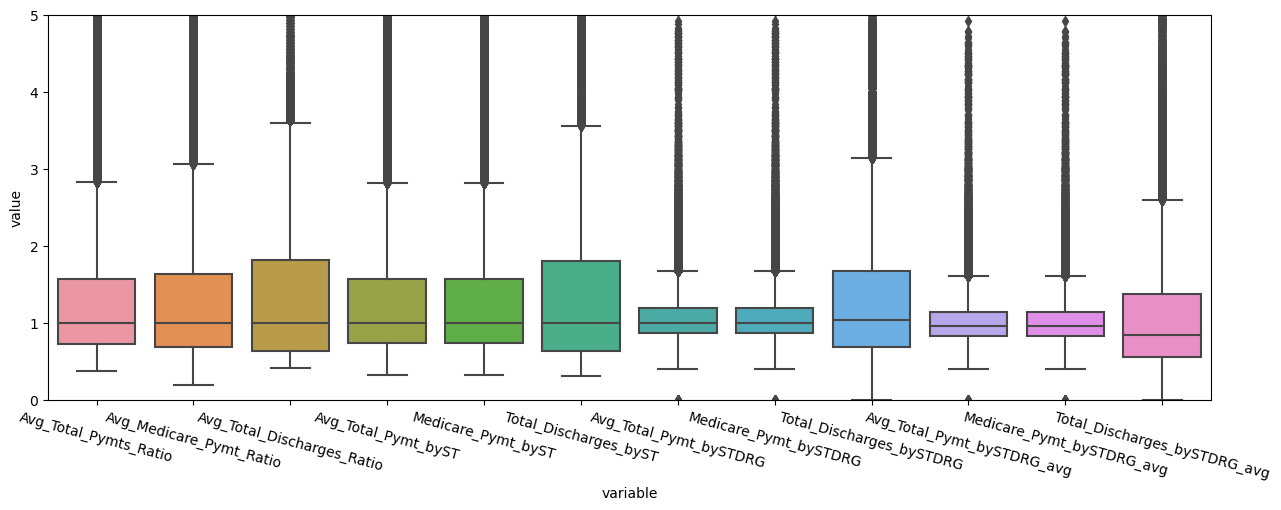

In [94]:
plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,5))
plt.xticks(rotation=-15)

sns.boxplot(x="variable", y="value", data=pd.melt(Features.iloc[:,2::]))

<AxesSubplot:xlabel='variable', ylabel='value'>

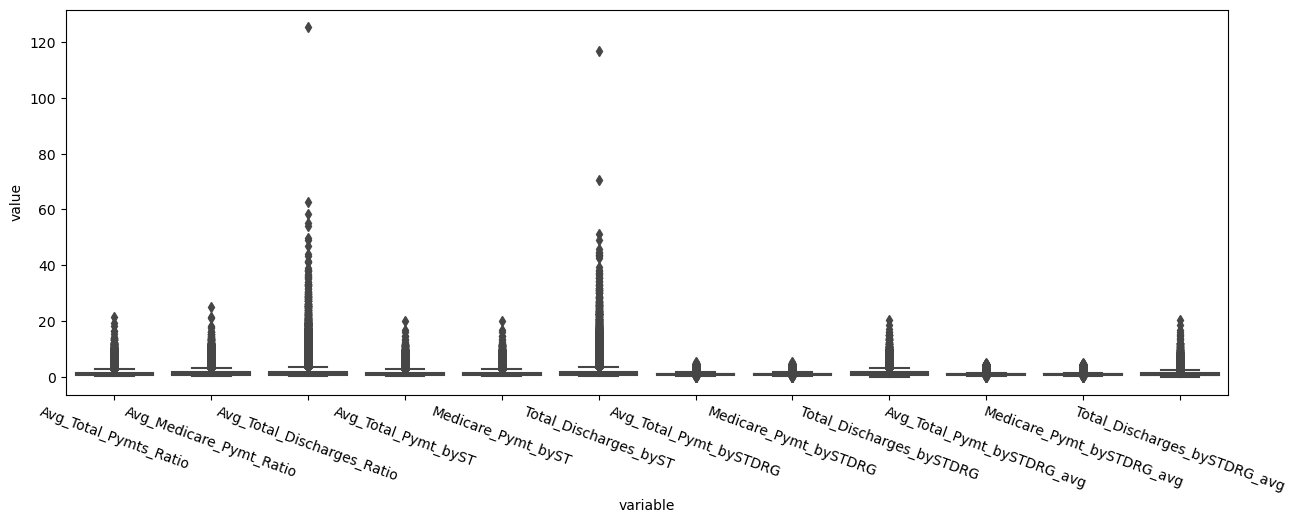

In [95]:
plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
plt.xticks(rotation=-20)

sns.boxplot(x="variable", y="value", data=pd.melt(Features.iloc[:,2::]))

### Summary:
1. From the features boxplot, we can see that every features are right skewed, and for some features, their anomalous outlier have reached 120 times more than ratio;
2. There are so many anomalies in the dataset, and our features can help us to find these data points;
3. Since we don't have target variable, we will use unsupervised ML technique to find anomalies.

# Section 2: Modeling

## Section 2.1: Standardization

In [96]:
# 0.Standardize and Scale the Dataset
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler

'''
variables = ['Avg_Total_Pymts_Ratio', 'Avg_Medicare_Pymt_Ratio', 'Avg_Total_Discharges_Ratio', 'Avg_Total_Pymt_byST', 'Medicare_Pymt_byST','Total_Discharges_byST', 'Avg_Total_Pymt_bySTDRG', 'Medicare_Pymt_bySTDRG', 'Total_Discharges_bySTDRG', 'Avg_Total_Pymt_bySTDRG_avg', 'Medicare_Pymt_bySTDRG_avg', 'Total_Discharges_bySTDRG_avg']
x = df.loc[:, variables].values
#y = df.loc[:,[target]].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)


'''
#0. Standardize and scale the Dataset, the numeric variables
scaler = StandardScaler()
scaler.fit(Features.drop(['DRG','ST'], axis=1))

scaled_features = scaler.transform(Features.drop(['DRG','ST'], axis=1))
scaled_df = pd.DataFrame(scaled_features, columns = Features.drop(['DRG','ST'],axis=1).columns)

scaled_df.head(3)

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg
0,-0.512776,-0.510403,0.943640,-0.344831,-0.344831,1.128103,-1.116364,-1.116364,2.524320,-1.037184,-1.037184,3.286577
1,-0.511428,-0.481265,-0.563094,-0.343103,-0.343103,-0.547925,-0.120457,-0.120457,1.732056,-0.037967,-0.037967,1.469360
2,-0.557435,-0.552805,-0.367414,-0.402073,-0.402073,-0.330259,-0.240415,-0.240415,1.536120,-0.231628,-0.231628,1.298659


## Section 2.2: Autoencoder

### What's Autoencoder?
Autoencoder model is a special type of neural network that is trained to copy its input to its output. For example, autoencoder first encodes the input/image into a lower dimensional latent representation, then decodes the latent representation back to an output/image. Since it does not require the target variable like a standard neural network model, or in other words, the target variable is the input variable, it is categorized as unsupervised learning.

### Why Autoencoder?
Autoencoder can be widely applied in anomaly detection because we care about the "bottleneck" part, since during the process of compressing to lower dimension, we would lose the information of datapoints that followed same distribution, in other words, because the outliers is anomalous, so the distribution would not be same as the datapoints in normal groups, and the outliers is the "bottleneck" that we cared about.

### Section 2.2.1: Train-test split

In [97]:
#split dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test = train_test_split(scaled_df, test_size=0.3, random_state=42)

### Section 2.2.3: Autoencoder Modeling

### Autoencoder
* We will build three models: clf1, clf2, and clf3
* clf1 has hidden_neurons = [25, 2, 2, 25]
* clf2 has hidden_neurons = [25, 10, 2, 10, 25]
* clf3 has hidden_neurons = [25, 15, 10, 2, 10, 15, 25])
* The number of the hidden layers and the number of neutrons in a hidden layer: if there are too many hidden layers or too many neutrons, the model tends to overfit; otherwise the model tends to underfit.

#### Model 1

In [98]:
#from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder

clf1 = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 12)                156       
                                                                 
 dropout_22 (Dropout)        (None, 12)                0         
                                                                 
 dense_26 (Dense)            (None, 12)                156       
                                                                 
 dropout_23 (Dropout)        (None, 12)                0         
                                                                 
 dense_27 (Dense)            (None, 25)                325       
                                                                 
 dropout_24 (Dropout)        (None, 25)                0         
                                                                 
 dense_28 (Dense)            (None, 2)                

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7facb0323310>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [99]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf1.decision_function(X_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

1529/1529 [==============================] - 3s 2ms/step


In [100]:
y_test_pred.value_counts()

0    43948
1     4972
dtype: int64

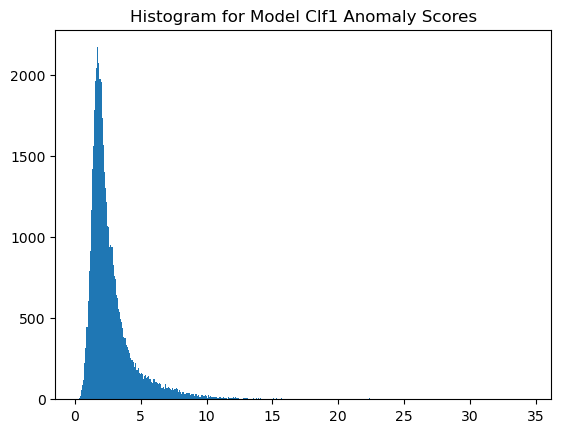

In [101]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [106]:
df_test = X_test.copy()
df_test['score'] = y_test_scores.values
df_test['cluster'] = np.where(df_test['score']<5, 0, 1)
df_test['cluster'].value_counts()

0    44103
1     4817
Name: cluster, dtype: int64

In [82]:
y_test_scores.values

array([-0.04802576, -0.12049989, -0.10597141, ..., -0.11566492,
       -0.12700697, -0.01466496])

In [79]:
df_test.shape

(48920, 14)

In [135]:
y_test_scores

0        4.159920
1        2.278387
2        2.865211
3        1.890159
4        1.227750
           ...   
48915    2.005058
48916    1.677419
48917    2.609369
48918    2.554605
48919    4.678828
Length: 48920, dtype: float64

In [107]:
df_test.groupby('cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,score
cluster,,,,,,,,,,,,,
0,-0.154865,-0.153108,-0.079168,-0.155538,-0.155538,-0.079388,-0.107016,-0.107016,-0.079271,-0.108045,-0.108045,-0.079369,2.267217
1,1.382279,1.366178,0.681559,1.378325,1.378325,0.675286,1.024371,1.024371,0.726976,1.021915,1.021915,0.721317,7.500297


### Model 1 Analysis:
1. In model 1, we set up the number of hidder layers to be 4, number of hidden_neurons =[25, 2, 2, 25], the contamination rate is using default, 0.1;
2. There is no clear distinguished threshold from the anomaly scores distribution graph, I set the threshhold values to be 5, which means in cluster 0, the anomaly scores of test dataset is less than 5, and the anomaly score of the cluster 1 is greater than 5;
3. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative and close to 0, while all mean scores of cluster 1 in all features is ranging from 0 to 2; also, the anomaly score of 'outlier' group is 3.3 times higher than the 'normal' group(2.26 in cluster 0, 7.5 in cluster 1). Therefore 'outlier' group dataset is the anomalous/outlier group.

#### Model 2

In [108]:
clf2 = AutoEncoder(hidden_neurons =[25, 10,2, 10, 25])
clf2.fit(X_train)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 12)                156       
                                                                 
 dropout_28 (Dropout)        (None, 12)                0         
                                                                 
 dense_33 (Dense)            (None, 12)                156       
                                                                 
 dropout_29 (Dropout)        (None, 12)                0         
                                                                 
 dense_34 (Dense)            (None, 25)                325       
                                                                 
 dropout_30 (Dropout)        (None, 25)                0         
                                                                 
 dense_35 (Dense)            (None, 10)               

Epoch 56/100
3211/3211 [==============================] - 11s 4ms/step - loss: 0.9474 - val_loss: 0.9226
Epoch 57/100
3211/3211 [==============================] - 11s 3ms/step - loss: 0.9479 - val_loss: 0.9390
Epoch 58/100
3211/3211 [==============================] - 10s 3ms/step - loss: 0.9488 - val_loss: 0.9206
Epoch 59/100
3211/3211 [==============================] - 11s 3ms/step - loss: 0.9473 - val_loss: 0.9194
Epoch 60/100
3211/3211 [==============================] - 11s 3ms/step - loss: 0.9453 - val_loss: 0.9161
Epoch 61/100
3211/3211 [==============================] - 11s 3ms/step - loss: 0.9464 - val_loss: 0.9176
Epoch 62/100
3211/3211 [==============================] - 11s 4ms/step - loss: 0.9480 - val_loss: 0.9151
Epoch 63/100
3211/3211 [==============================] - 11s 3ms/step - loss: 0.9470 - val_loss: 0.9177
Epoch 64/100
3211/3211 [==============================] - 11s 3ms/step - loss: 0.9475 - val_loss: 0.9123
Epoch 65/100
3211/3211 [==============================]

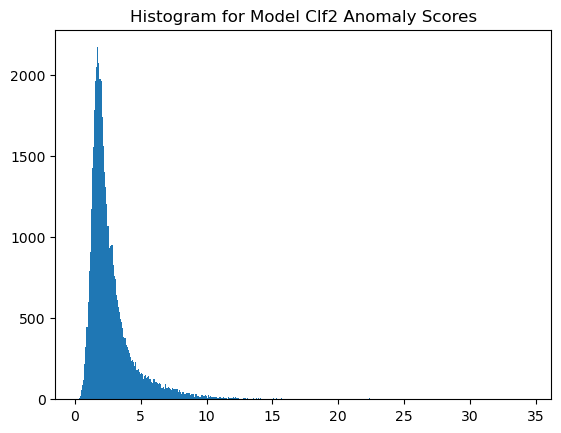

In [109]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [112]:
df_test = X_test.copy()
df_test['score'] = y_test_scores.values
df_test['cluster'] = np.where(df_test['score']<5, 0, 1)
df_test['cluster'].value_counts()

0    44104
1     4816
Name: cluster, dtype: int64

In [113]:
df_test.groupby('cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,score
cluster,,,,,,,,,,,,,
0,-0.154872,-0.153116,-0.079084,-0.155544,-0.155544,-0.079312,-0.107018,-0.107018,-0.079257,-0.108047,-0.108047,-0.079353,2.267487
1,1.382669,1.366565,0.680944,1.378700,1.378700,0.674741,1.024628,1.024628,0.727015,1.022166,1.022166,0.721334,7.500658


### Model 2 Analysis:
1. In model 2, we set up the number of hidder layers to be 5, number of hidden_neurons =[25, 10, 2, 10, 25], the contamination rate is using default, 0.1;
2. There is no clear distinguished threshold from the anomaly scores distribution graph, I set the threshhold values to be 5, which means in cluster 0, the anomaly scores of test dataset is less than 5, and the anomaly score of the cluster 1 is greater than 5;
3. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative and close to 0, while all mean scores of cluster 1 in all features is ranging from 0 to 2; also, the anomaly score of 'outlier' group is 3.3 times higher than the 'normal' group(2.26 in cluster 0, 7.5 in cluster 1). Therefore 'outlier' group dataset is the anomalous/outlier group.

#### Model 3

In [114]:
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
clf3.fit(X_train)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 12)                156       
                                                                 
 dropout_35 (Dropout)        (None, 12)                0         
                                                                 
 dense_41 (Dense)            (None, 12)                156       
                                                                 
 dropout_36 (Dropout)        (None, 12)                0         
                                                                 
 dense_42 (Dense)            (None, 25)                325       
                                                                 
 dropout_37 (Dropout)        (None, 25)                0         
                                                                 
 dense_43 (Dense)            (None, 15)               

Epoch 51/100
3211/3211 [==============================] - 14s 4ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 52/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 53/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 54/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 55/100
3211/3211 [==============================] - 10s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 56/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 57/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 58/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 59/100
3211/3211 [==============================] - 11s 3ms/step - loss: 1.0011 - val_loss: 0.9901
Epoch 60/100
3211/3211 [==============================]

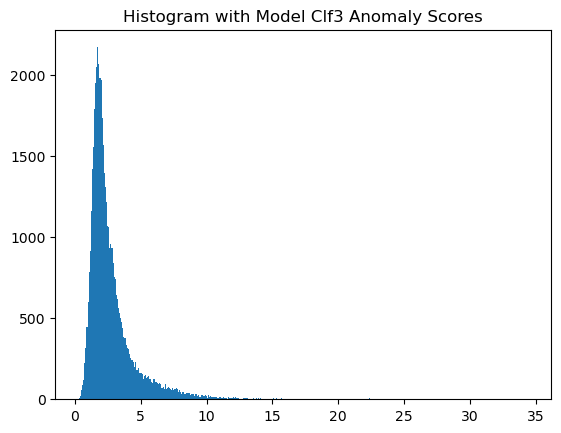

In [115]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

In [116]:
df_test = X_test.copy()
df_test['score'] = y_test_scores.values
df_test['cluster'] = np.where(df_test['score']<5, 0, 1)
df_test['cluster'].value_counts()

0    44104
1     4816
Name: cluster, dtype: int64

In [117]:
df_test.groupby('cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,score
cluster,,,,,,,,,,,,,
0,-0.154868,-0.153111,-0.079180,-0.155546,-0.155546,-0.079400,-0.106961,-0.106961,-0.079252,-0.107988,-0.107988,-0.079351,2.267319
1,1.382629,1.366520,0.681825,1.378723,1.378723,0.675547,1.024103,1.024103,0.726971,1.021625,1.021625,0.721320,7.500687


### Model 3 Analysis:
1. In model 3, we set up the number of hidder layers to be 7, number of hidden_neurons =[25, 15, 10, 2, 10,15, 25], the contamination rate is using default, 0.1;
2. There is no clear distinguished threshold from the anomaly scores distribution graph, I set the threshhold values to be 5, which means in cluster 0, the anomaly scores of test dataset is less than 5, and the anomaly score of the cluster 1 is greater than 5;
3. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative and close to 0, while all mean scores of cluster 1 in all features is ranging from 0 to 2; also, the anomaly score of 'outlier' group is 3.3 times higher than the 'normal' group(2.26 in cluster 0, 7.5 in cluster 1). Therefore 'outlier' group dataset is the anomalous/outlier group.

## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are four methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)
* (3) Average of Maximum (AOM)
* (4) Maximum of Average (MOA)

### For here, we choose Average method

In [118]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

1529/1529 [==============================] - 3s 2ms/step


In [119]:
train_scores.head()

,clf1,clf2,clf3
0,3.635477,3.633987,3.635872
1,3.936146,3.937351,3.935922
2,4.153931,4.155231,4.153477
3,2.927320,2.927890,2.927825
4,2.055586,2.056381,2.055869


In [120]:
test_scores.head()

,clf1,clf2,clf3
0,4.159235,4.157218,4.159920
1,2.278311,2.279944,2.278387
2,2.865869,2.866855,2.865211
3,1.889883,1.888431,1.890159
4,1.228033,1.228986,1.227750


In [121]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [122]:
train_scores_norm.shape

(114145, 3)

### Average
Merge the outlier scores from multiple estimators by taking the average.

In [123]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.25241375,  0.03453308, -0.44272997, -0.76591175, -0.57144391,
        4.58912424, -0.2243184 ,  0.68400777,  0.16480487])

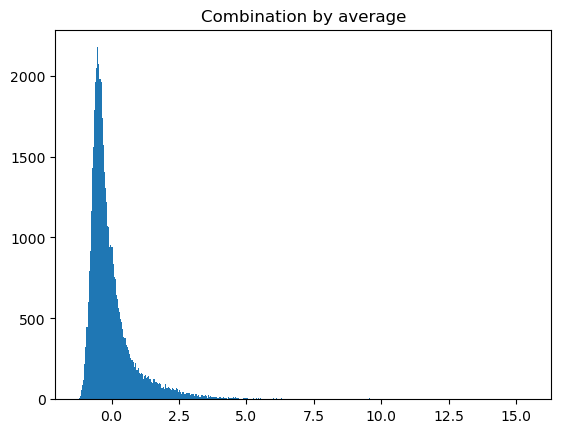

In [124]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [129]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<1, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    43801
1     5119
Name: y_by_average_cluster, dtype: int64

In [130]:
df_test.groupby('y_by_average_cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,
0,-0.158344,-0.156492,-0.083950,-0.159006,-0.159006,-0.084230,-0.113150,-0.113150,-0.084206,-0.114161,-0.114161,-0.084395,-0.267005
1,1.321368,1.305499,0.677594,1.317513,1.317513,0.672193,1.010113,1.010113,0.721634,1.007582,1.007582,0.717083,2.225060


### Aggregating multiple models by Average Analysis:
1. In order to avoid overfitting, we can aggregate multiple models by average, from the modeling, we set up the threshold to be 1;
2. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative and close to 0, while all mean scores of cluster 1 in all features is ranging from 0 to 2; Outlier" group suggest that these data points exhibit more pronounced deviations from the norm and are more likely to be outliers.

### Autoencoder Analysis Summary:
1. Identify anomalous cluster: in previous 3 models, we set up the threshold=5, then seperate the normal and outliers group, for each group we calculate the score in mean, in each outliers group, the mean score is 3-4 times higher than the normal group, "Outlier" group suggest that these data points exhibit more pronounced deviations from the norm and are more likely to be outliers.
2. By aggregating models: our model would be more stable, ensemble methods can be more stable and less sensitive to small changes in the training data. This stability can prevent overfitting to specific training instances and improve the reliability of the model on new data.

## Section 2.3: iForest

### What's iForest?
iForest stands for Isolation Forest, Isolation Forest is an ensemble method (similar to random forest), The algorithm has a linear time complexity and a low memory requirement, which works well with high-volume data. Not like random forest, Rather than profiling normal data points in order to find outliers, IForest identifies anomalies directly.

### Why iForest?
Since  iForest is only focus on the isoloate trees, therefore is widely used in anomaly detection. If a tree structure to isolate every observation, then we can conclude that anomalies would be the data points first to be singled out.

### Section 2.3.1: Train-test split

In [136]:
X = scaled_df
#y = data[['DRG','Provider_Name','Provider_City','Provider_State']]

# 1. Split data into X_train and X_test
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
#X_train_pd = pd.DataFrame(X_train)

In [137]:
print(X_train.shape, X_test.shape)

(114145, 12) (48920, 12)


## IForest
* You do not need the target variable to train the unsupervised learning model.
* We will create three models: clf1, clf2,and clf3
* Model 1: max_samples = 100
* Model 2: max_samples = 80
* Model 3: max_samples = 60
* Suppose your data has 10,000 samples, you can set the max_samples to be anywhere between 100 and 10,000.

#### Model 1

In [138]:
clf1 = IForest(behaviour="new", max_samples=100) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [139]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

/Users/ruxizhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


0   -0.043469
1   -0.111199
2   -0.077742
3   -0.143230
4   -0.175555
dtype: float64

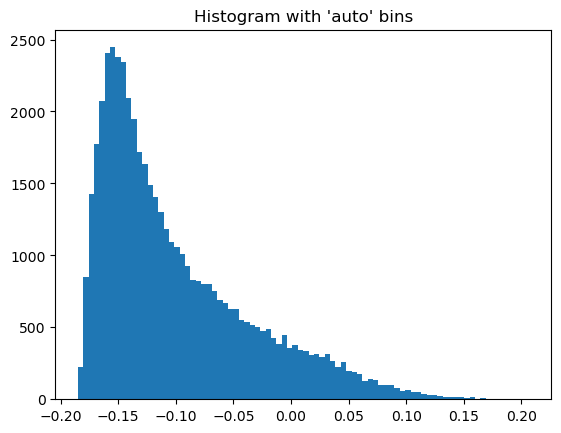

In [140]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

* We will identify the outliers as a cluster and demonstrate the X attributes
* A high anomaly score means more abnormal. We can suggest those >=0 to be outliers

In [143]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores.values
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.0, 0, 1)
X_test_cluster['cluster'].value_counts()

0    43991
1     4929
Name: cluster, dtype: int64

In [144]:
X_test_cluster.groupby('cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,distance
cluster,,,,,,,,,,,,,
0,-0.144649,-0.142903,-0.100602,-0.144695,-0.144695,-0.100963,-0.121679,-0.121679,-0.073872,-0.122867,-0.122867,-0.074296,-0.116158
1,1.256181,1.240571,0.855567,1.246705,1.246705,0.850693,1.129529,1.129529,0.660469,1.128522,1.128522,0.657849,0.043528


### Model 1 Analysis:

1. In model 1, we set the max_samples=100, which means that each tree in the forest will be built using a random subset of 100 datapoints drawn from whole dataset;
2. There is no clear distinguished threshold from the anomaly scores distribution graph, I set the threshhold values to be 0, a higher anomaly score means more abnormal;
3. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative, but the anomaly score of cluster 1 in each feature is greater than 0; We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

#### Model 2

In [145]:
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [146]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

/Users/ruxizhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


0   -0.039253
1   -0.109769
2   -0.114348
3   -0.148274
4   -0.189658
dtype: float64

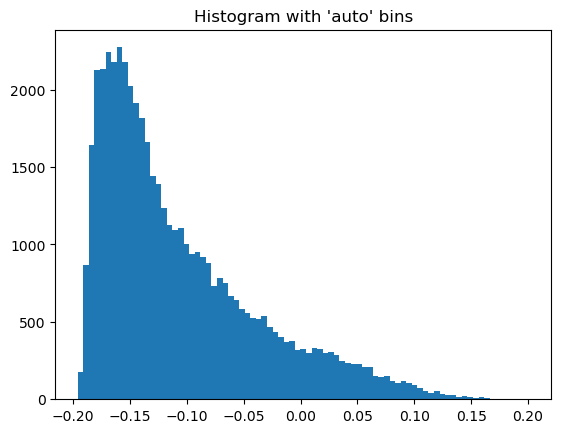

In [147]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [150]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores.values
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0, 0, 1)
X_test_cluster['cluster'].value_counts()

0    44015
1     4905
Name: cluster, dtype: int64

In [151]:
X_test_cluster.groupby('cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,distance
cluster,,,,,,,,,,,,,
0,-0.182571,-0.180541,-0.071881,-0.183414,-0.183414,-0.072871,-0.097907,-0.097907,-0.060490,-0.099038,-0.099038,-0.061174,-0.123597
1,1.603322,1.585087,0.602519,1.600956,1.600956,0.603260,0.922336,0.922336,0.543975,0.920816,0.920816,0.543677,0.047566


### Model 2 Analysis:

1. In model 2, we set the max_samples=80, which means that each tree in the forest will be built using a random subset of 80 datapoints drawn from whole dataset;
2. There is no clear distinguished threshold from the anomaly scores distribution graph, I set the threshhold values to be 0, a higher anomaly score means more abnormal;
3. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative, but the anomaly score of cluster 1 in each feature is greater than 0; We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

#### Model 3

In [152]:
clf3 = IForest(behaviour="new", max_samples=60) 
clf3.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=60, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [153]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

/Users/ruxizhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


0   -0.048330
1   -0.102355
2   -0.090906
3   -0.148981
4   -0.185141
dtype: float64

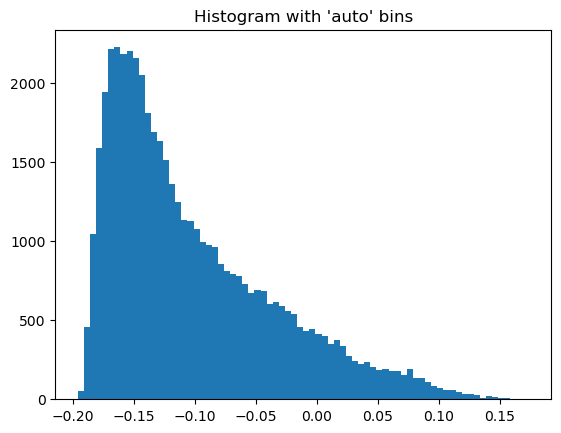

In [154]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [157]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores.values
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0, 0, 1)
X_test_cluster['cluster'].value_counts()

0    44007
1     4913
Name: cluster, dtype: int64

In [158]:
X_test_cluster.groupby('cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,distance
cluster,,,,,,,,,,,,,
0,-0.187727,-0.185402,-0.066989,-0.188230,-0.188230,-0.067814,-0.099654,-0.099654,-0.039301,-0.100898,-0.100898,-0.039402,-0.117980
1,1.646597,1.625750,0.557602,1.641191,1.641191,0.556867,0.936327,0.936327,0.353201,0.935818,0.935818,0.347680,0.044766


### Model 3 Analysis:

1. In model 3, we set the max_samples=60, which means that each tree in the forest will be built using a random subset of 60 datapoints drawn from whole dataset;
2. There is no clear distinguished threshold from the anomaly scores distribution graph, I set the threshhold values to be 0, a higher anomaly score means more abnormal;
3. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative, but the anomaly score of cluster 1 in each feature is greater than 0; We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are four methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)
* (3) Average of Maximum (AOM)
* (4) Maximum of Average (MOA)

### For here, we choose Average method

In [159]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [160]:
# The predictions of the training data can be obtained by clf.decision_scores_.
# It is already generated during the model building process.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

/Users/ruxizhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/ruxizhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/ruxizhou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [161]:
train_scores.head()

,clf1,clf2,clf3
0,-0.059996,-0.072839,-0.048848
1,-0.024068,-0.018288,-0.002627
2,0.006880,-0.014830,0.001136
3,-0.099521,-0.071309,-0.070978
4,-0.168108,-0.171368,-0.165106


In [162]:
test_scores.head()

,clf1,clf2,clf3
0,-0.043469,-0.039253,-0.048330
1,-0.111199,-0.109769,-0.102355
2,-0.077742,-0.114348,-0.090906
3,-0.143230,-0.148274,-0.148981
4,-0.175555,-0.189658,-0.185141


In [163]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [164]:
train_scores_norm.shape

(114145, 3)

### Average
The "average" function in PyOD averages the outlier scores from multiple estimators.

In [165]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([-0.07984078,  0.12444172, -0.65526748, -1.19466498, -0.89969728,
        3.05825321, -0.57189498,  1.39575803,  0.42818774])

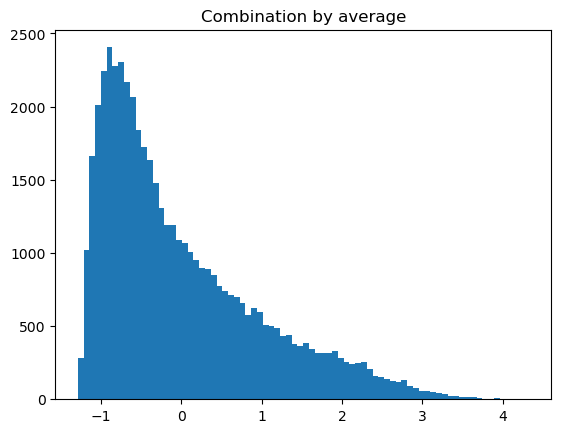

In [166]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [171]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<1.5, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    43980
1     4940
Name: y_by_average_cluster, dtype: int64

In [169]:
df_test.groupby('y_by_average_cluster').mean()

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,
0,-0.175801,-0.173857,-0.080992,-0.176023,-0.176023,-0.081963,-0.108196,-0.108196,-0.056627,-0.109349,-0.109349,-0.056779,-0.245961
1,1.530403,1.513070,0.678851,1.522508,1.522508,0.679417,1.006711,1.006711,0.505301,1.005392,1.005392,0.500270,2.152206


### Aggregating multiple models by Average Analysis:
1. In order to avoid overfitting, we can aggregate multiple models by average, from the modeling, we set up the threshold to be 1;
2. After calculate the mean value of each feature in both clusters, we can see that the mean scores of cluster 0 in each feature/variable is negative, while all mean scores of cluster 1 in all features is ranging from 0 to 2; Outlier group suggest that these data points exhibit more pronounced deviations from the norm and are more likely to be outliers.

### iForest Analysis Summary:
1. Identify anomalous cluster: in previous 3 models, we tuned the parameters and we set the threshold=0, then seperate the normal and outliers group, for each group we calculate the score in mean, in each outliers group, the mean distance score is greater the normal group, "Outlier" group suggest that these data points exhibit more pronounced deviations from the norm and are more likely to be outliers.
2. By aggregating models: our model would be more stable, ensemble methods can be more stable and less sensitive to small changes in the training data. This stability can prevent overfitting to specific training instances and improve the reliability of the model on new data.

# Summary

##### Business insight:
1. Both Autoencoder and iForest are very efficient in anomaly detection, they offer advantages in terms of efficiency and effectiveness, they are well-suited for scenarios where efficiency is a priority, making them valuable choices for anomaly detection tasks;
2. The "Outlier" group might might represent cases that need closer examination, this could be due to potential fraud, this group represent cases that are unusual but not necessarily fraudulent. They might be cases that require special attention due to their high values. We can use the invesitigate in these cases and trace back the datapoint to the original dataset, find out the common points that these anomalies have made, remark them and use these as important variables/feature therefor further improve our initial modeling regulatories.